<a href="https://colab.research.google.com/github/JeffreyW2468/LACC_work/blob/main/JW_knn_penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k Nearest Neighbor (KNN) Algorithm for Penguin Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# parameters
penguin_species = ['Adelie', 'Chinstrap', 'Gentoo']
k = 15

## Load and clean data

In [19]:
penguin_data = sns.load_dataset("penguins")
penguin_data = penguin_data[['flipper_length_mm', 'bill_length_mm', 'species']]

# TODO: remove missing data
penguin_data.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
print(penguin_data)

# access data in pandas
print(penguin_data.iloc[1,1])
print(penguin_data.iloc[0,2])
print(penguin_data.iloc[10,0])

     flipper_length_mm  bill_length_mm species
0                181.0            39.1  Adelie
1                186.0            39.5  Adelie
2                195.0            40.3  Adelie
4                193.0            36.7  Adelie
5                190.0            39.3  Adelie
..                 ...             ...     ...
338              214.0            47.2  Gentoo
340              215.0            46.8  Gentoo
341              222.0            50.4  Gentoo
342              212.0            45.2  Gentoo
343              213.0            49.9  Gentoo

[342 rows x 3 columns]
39.5
Adelie
180.0


### Question 1
If you output the data, we will see some missing data.

The missing data pose difficulty when you apply the algorithm.

Can you try to clean up the data?

Hint: There is one-line code that can do the job. Maybe google "remove missing data in pandas", and learn from the example.

## Classify a single point by KNN

the distance is  16.63850954863446
195
45


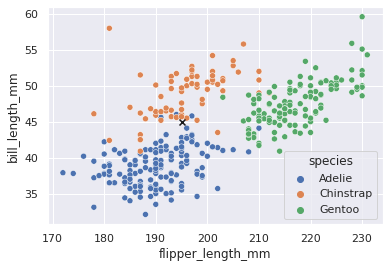

In [21]:
new_point = np.array([[195, 45]])

#print(penguin_data.iloc[10,:])

# access data
print(new_point[0,0])
print(new_point[0,1])

sns.scatterplot(data=penguin_data, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.scatter(new_point[:,0], new_point[:,1], marker='x', color='k')
xmin, xmax, ymin, ymax = plt.axis()

In [73]:

def knn(train_data, test_data, k):
  '''
    Inputs:
    - train_data is a numpy array of size (num_examples, 3)
    - test_data is a numpy array of size (num_test, 2)
  '''

  species_arr = np.zeros((len(test_data), 1), dtype=int)

    # TODO


  for j in range(len(test_data)):

    # 1. calculate the distance 
    distance_arr = np.zeros((len(train_data), 1))
        
    for i in range(len(train_data)):
      distance_arr[i,0] = np.sqrt((train_data.iloc[i,0] - test_data[j,0])**2 + (train_data.iloc[i,1] - test_data[j,1])**2)
    # print(distance_arr)
  
        
    # 2. pick the k nearest neighbor by the distance
    nearest_neighbor_index = np.argsort(distance_arr[:,0])[0:k]
    # print(nearest_neighbor_index)

    # 3. check out the labels of these k nearest neighbors
    neighbor_data = train_data.iloc[nearest_neighbor_index,2].tolist()


    # 4. count each label
    species_count = np.zeros((3,1))  
    for i in range(3):
        species_count[i,0] = neighbor_data.count(penguin_species[i])

    # 5. decide the label from majority vote
    species_arr[j,0] = np.argmax(species_count)
                
  return species_arr


In [74]:
detected_arr = knn(penguin_data, new_point, k)

for j in range(len(new_point)):
	print('The predicted species is ' + penguin_species[detected_arr[j,0]])

The predicted species is Chinstrap


### Question 2
The correct answer should be Chinstrap.

Implement the function `knn` and you will see the correct result.

## Creat the whole decision map

(30.725, 60.975)

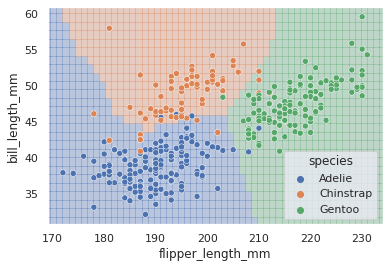

In [75]:
x_min, x_max = penguin_data.iloc[:,0].min(), penguin_data.iloc[:,0].max()
y_min, y_max = penguin_data.iloc[:,1].min(), penguin_data.iloc[:,1].max()
x_range = x_max - x_min
y_range = y_max - y_min
xx, yy = np.meshgrid(np.arange(x_min - 0.1*x_range, x_max + 0.1*x_range, x_range*0.02),
                     np.arange(y_min - 0.1*y_range, y_max + 0.1*y_range, x_range*0.02))

species_map = knn(penguin_data, np.c_[xx.ravel(), yy.ravel()], k);


# Put the result into a color plot
species_map = np.asarray(species_map).reshape(xx.shape)


plt.figure()
plt.pcolormesh(xx, yy, species_map, alpha=0.3, edgecolors='none',
	cmap=ListedColormap(sns.color_palette().as_hex()[0:3]), vmin=0, vmax=2)

sns.scatterplot(data=penguin_data, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

### Question 3
Once the function `knn` is correct, you will see the map.

### Discussion
- the distance between two data points
- the number of neighbors

# K means clustering

[0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 2 0
 2 0 0 0 2 0 2 0 0 0 2 0 0 0 0 2 2 0 0 0 1 0 2 0 2 0 2 0 0 0 0 2 0 0 2 2 2
 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 1 2 2 1 0 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 2 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


(30.725, 60.975)

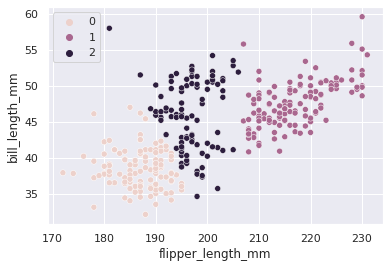

In [76]:
from sklearn.cluster import KMeans

no_label_penguin_data = penguin_data[['flipper_length_mm', 'bill_length_mm']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(no_label_penguin_data)
print(kmeans.labels_)

sns.scatterplot(data=no_label_penguin_data, x="flipper_length_mm", y="bill_length_mm", hue=kmeans.labels_)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

### Question 4
Please compare the result to the first figure (data with label), and share your observation.

Please also try different clustering algorithms from `sklearn`, and compare the difference.